In [186]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

import matplotlib.pyplot as plt

from fairlearn.metrics import MetricFrame, false_negative_rate, selection_rate

import sys
sys.path.append(os.path.abspath('..'))
from util import evaluate_model_performance, evaluate_model_fairness

Load train/test data from csv files

In [187]:
data_path = Path(os.getcwd()).parent.parent / "data" / "dataset_diabetes" / "clsf_data"

target_variable = "readmit_30_days"
sensitive_attribute = "race"

X_test = pd.read_csv(data_path / "X_test_split.csv")
X_A_test = pd.read_csv(data_path / "X_A_test_split.csv")
Y_test = pd.read_csv(data_path / "Y_test_split.csv")[target_variable]
A_test = pd.read_csv(data_path / "A_test_split.csv")[sensitive_attribute]

X_train = pd.read_csv(data_path / "X_train_split.csv")
X_A_train = pd.read_csv(data_path / "X_A_train_split.csv")
Y_train = pd.read_csv(data_path / "Y_train_split.csv")[target_variable]
A_train = pd.read_csv(data_path / "A_train_split.csv")[sensitive_attribute]

X_train_res_target_wos = pd.read_csv(data_path / "X_train_res_target_wos.csv")
Y_train_res_target_wos = pd.read_csv(data_path / "Y_train_res_target_wos.csv")[target_variable]

X_A_train_res_target_ws = pd.read_csv(data_path / "X_A_train_res_target_ws.csv")
Y_train_res_target_ws = pd.read_csv(data_path / "Y_train_res_target_ws.csv")[target_variable]

X_train_res_sensitive_wos = pd.read_csv(data_path / "X_train_res_sensitive_wos.csv")
Y_train_res_sensitive_wos = pd.read_csv(data_path / "Y_train_res_sensitive_wos.csv")[target_variable]

X_A_train_res_sensitive_ws = pd.read_csv(data_path / "X_A_train_res_sensitive_ws.csv")
Y_train_res_sensitive_ws = pd.read_csv(data_path / "Y_train_res_sensitive_ws.csv")[target_variable]

X_train_res_multiv_wos = pd.read_csv(data_path / "X_train_res_multiv_wos.csv")
Y_train_res_multiv_wos = pd.read_csv(data_path / "Y_train_res_multiv_wos.csv")[target_variable]

X_A_train_res_multiv_ws = pd.read_csv(data_path / "X_A_train_res_multiv_ws.csv")
Y_train_res_multiv_ws = pd.read_csv(data_path / "Y_train_res_multiv_ws.csv")[target_variable]

In [188]:
X_train_list = [X_train, X_A_train, X_train_res_target_wos, X_A_train_res_target_ws, X_train_res_sensitive_wos, \
              X_A_train_res_sensitive_ws, X_train_res_multiv_wos, X_A_train_res_multiv_ws]

Y_train_list = [Y_train, Y_train, Y_train_res_target_wos, Y_train_res_target_ws, Y_train_res_sensitive_wos, \
                Y_train_res_sensitive_ws, Y_train_res_multiv_wos, Y_train_res_multiv_ws]

X_test_list = [X_test, X_A_test, X_test, X_A_test, X_test, X_A_test, X_test, X_A_test]

dataset_ref = [ 'no resampling, w/o sensitive attribute', 'no resampling, with sensitive attribute', \
                'target-resample, w/o sensitive attribute', 'target-resample, with sensitive attribute', \
                'sensitive-resample, w/o sensitive attribute', 'sensitive-resample, with sensitive attribute', \
                'multivariate-resample, w/o sensitive attribute', 'multivariate-resample, with sensitive attribute']

In [191]:
def train_model_on_datasets(model):
    for (X_train_i, Y_train_i, X_test_i, ref_i) in zip(X_train_list, Y_train_list, X_test_list, dataset_ref):
        print()
        print(ref_i)
        model_copy = clone(model)
        model_copy.fit(X_train_i, Y_train_i)
        # Predicting on the test data
        model_pred = model_copy.predict(X_test_i)
        evaluate_model_performance(Y_test, model_pred)
        evaluate_model_fairness(Y_test, model_pred, A_test)
    

### Grid search?

In [ ]:
# params =  {
#     'criterion': ['gini', 'entropy', 'log_loss'],
#     'max_depth': range(10,30)   
# }

# dtc = DecisionTreeClassifier(random_state=123)

# grid_search = GridSearchCV(estimator=dtc,
#                     param_grid=params,
#                     scoring='recall')

# grid_search.fit(X_train, Y_train)

In [151]:
# grid_search.best_score_, grid_search.best_params_

(nan, {'criterion': 'gini', 'max_depth': 10})

### Decision tree

In [192]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
train_model_on_datasets(decision_tree)

# for (X_train_i, Y_train_i, X_test_i, ref_i) in zip(X_train_list, Y_train_list, X_test_list, dataset_ref):
#     print(ref_i)
#     model_copy = clone(decision_tree)
#     model_copy.fit(X_train_i, Y_train_i)
#     # Predicting on the test data
#     model_pred = model_copy.predict(X_test_i)
#     evaluate_model_performance(Y_test, model_pred)
#     evaluate_model_fairness(Y_test, model_pred, A_test)



no resampling, w/o sensitive attribute
The accuracy score for the testing data: 0.8844887731538348
The precision score for the testing data: 0.22602739726027396
The recall score for the testing data: 0.01453104359313078
The F1 score for the testing data: 0.0273065784029789
The F2 score for the testing data: 0.017876489707475626
The specificity score for the testing data: 0.9937506912952107
The balanced accuracy score for the testing data: 0.5041408674441707
The G mean score for the testing data: 0.12016752729383492
[[17969   113]
 [ 2238    33]]
The Demographic parity difference score for the testing data: 0.002592427858118065
The Equalized odds difference score for the testing data: 0.01522248243559719
The Equal opportunity difference score for the testing data: 0.01453104359313078

no resampling, with sensitive attribute


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score for the testing data: 0.8842922419299366
The precision score for the testing data: 0.2236842105263158
The recall score for the testing data: 0.014971378247468076
The F1 score for the testing data: 0.028064382996285595
The F2 score for the testing data: 0.018406236466002597
The specificity score for the testing data: 0.993474173210928
The balanced accuracy score for the testing data: 0.504222775729198
The G mean score for the testing data: 0.12195768785210476
[[17964   118]
 [ 2237    34]]
The Demographic parity difference score for the testing data: 0.007356843823174626
The Equalized odds difference score for the testing data: 0.038461538461538464
The Equal opportunity difference score for the testing data: 0.014971378247468076

target-resample, w/o sensitive attribute


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score for the testing data: 0.5981919127401366
The precision score for the testing data: 0.1538731981718036
The recall score for the testing data: 0.5781594011448701
The F1 score for the testing data: 0.24305812661977047
The F2 score for the testing data: 0.3726514162456718
The specificity score for the testing data: 0.6007078862957638
The balanced accuracy score for the testing data: 0.5894336437203169
The G mean score for the testing data: 0.5893258112485482
[[10862  7220]
 [  958  1313]]
The Demographic parity difference score for the testing data: 0.10331607059287651
The Equalized odds difference score for the testing data: 0.18025303247684887
The Equal opportunity difference score for the testing data: 0.5781594011448701

target-resample, with sensitive attribute


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score for the testing data: 0.5910185230678524
The precision score for the testing data: 0.1516058478185795
The recall score for the testing data: 0.5799207397622193
The F1 score for the testing data: 0.2403723307172842
The F2 score for the testing data: 0.3705475212424737
The specificity score for the testing data: 0.5924123437672824
The balanced accuracy score for the testing data: 0.5861665417647508
The G mean score for the testing data: 0.5861332652578187
[[10712  7370]
 [  954  1317]]
The Demographic parity difference score for the testing data: 0.11822736537576434
The Equalized odds difference score for the testing data: 0.14664554346328695
The Equal opportunity difference score for the testing data: 0.5799207397622193

sensitive-resample, w/o sensitive attribute


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score for the testing data: 0.8674888222866408
The precision score for the testing data: 0.1640378548895899
The recall score for the testing data: 0.04579480405107882
The F1 score for the testing data: 0.07160068846815835
The F2 score for the testing data: 0.05350895245935378
The specificity score for the testing data: 0.9706890830660325
The balanced accuracy score for the testing data: 0.5082419435585557
The G mean score for the testing data: 0.2108376540220706
[[17552   530]
 [ 2167   104]]
The Demographic parity difference score for the testing data: 0.023375170119461663
The Equalized odds difference score for the testing data: 0.05321507760532151
The Equal opportunity difference score for the testing data: 0.04579480405107882

sensitive-resample, with sensitive attribute


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score for the testing data: 0.8644917211221933
The precision score for the testing data: 0.14964028776978416
The recall score for the testing data: 0.04579480405107882
The F1 score for the testing data: 0.07012811867835468
The F2 score for the testing data: 0.05317517128540751
The specificity score for the testing data: 0.9673155624377834
The balanced accuracy score for the testing data: 0.506555183244431
The G mean score for the testing data: 0.2104709638819507
[[17491   591]
 [ 2167   104]]
The Demographic parity difference score for the testing data: 0.024403447754423102
The Equalized odds difference score for the testing data: 0.0598669623059867
The Equal opportunity difference score for the testing data: 0.04579480405107882

multivariate-resample, w/o sensitive attribute
The accuracy score for the testing data: 0.623544440623004
The precision score for the testing data: 0.1347065998102724
The recall score for the testing data: 0.4376926464112726


c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The F1 score for the testing data: 0.20601036269430048
The F2 score for the testing data: 0.3018890846139829
The specificity score for the testing data: 0.6468864063709766
The balanced accuracy score for the testing data: 0.5422895263911246
The G mean score for the testing data: 0.5321065900099252
[[11697  6385]
 [ 1277   994]]
The Demographic parity difference score for the testing data: 0.06074267171527692
The Equalized odds difference score for the testing data: 0.23831070889894418
The Equal opportunity difference score for the testing data: 0.4376926464112726

multivariate-resample, with sensitive attribute
The accuracy score for the testing data: 0.6105242470397484
The precision score for the testing data: 0.13453088653398812
The recall score for the testing data: 0.4583883751651255
The F1 score for the testing data: 0.2080127884903587
The F2 score for the testing data: 0.30941624063726075
The specificity score for the testing data: 0.6296316779117355
The balanced accuracy score f

c:\Users\Tanya\Desktop\TANYA\FMI\Masters\thesis\src\env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


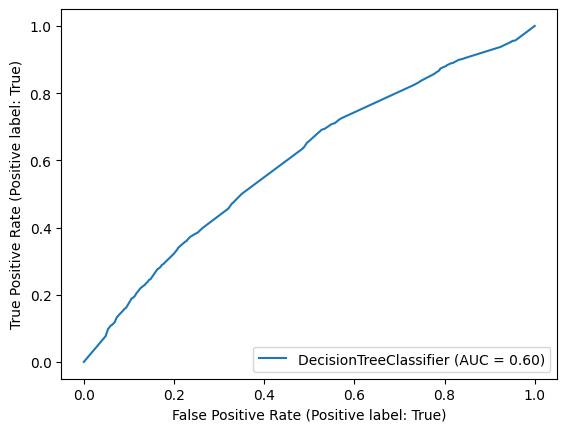

In [161]:
metrics.RocCurveDisplay.from_estimator(decision_tree, X_test, Y_test)

### Inspect feature importance

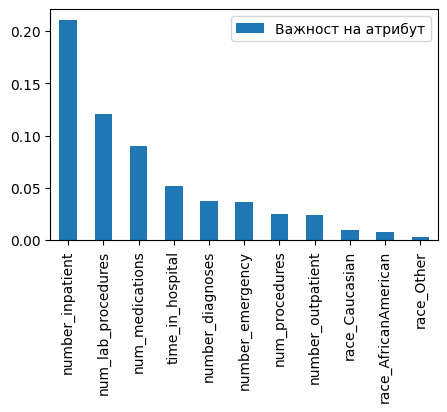

In [163]:
fig, ax = plt.subplots()

feat_importances = pd.DataFrame(decision_tree.feature_importances_[:11], index=X_train.columns[:11], columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(5,3), ax=ax)
#ax = df.plot(kind='bar') # "same" as above
ax.legend(["Важност на атрибут"])

### Further fairness assessment of the baseline model

Disaggregated metrics

In [164]:
metrics_dict = {
    "selection_rate": selection_rate,
    "recall": metrics.recall_score,
    "balanced_accuracy": metrics.balanced_accuracy_score
}

metricframe_baseline = MetricFrame(metrics=metrics_dict,
                  y_true=Y_test,
                  y_pred=decision_tree_pred,
                  sensitive_features=A_test)

metricframe_baseline.by_group

,selection_rate,recall,balanced_accuracy
race,,,
AfricanAmerican,0.346402,0.478299,0.574924
Caucasian,0.351166,0.473759,0.568927
Other,0.311406,0.5,0.605368
Unknown,0.263016,0.319149,0.530653


Statistics about the metrics

In [165]:
pd.DataFrame({'difference': metricframe_baseline.difference(),
              'ratio': metricframe_baseline.ratio(),
              'group_min': metricframe_baseline.group_min(),
              'group_max': metricframe_baseline.group_max()}).T

,selection_rate,recall,balanced_accuracy
difference,0.08815,0.180851,0.074715
ratio,0.74898,0.638298,0.87658
group_min,0.263016,0.319149,0.530653
group_max,0.351166,0.5,0.605368


Plot

array([[<Axes: title={'center': 'selection_rate'}, xlabel='race'>,
        <Axes: title={'center': 'recall'}, xlabel='race'>,
        <Axes: title={'center': 'balanced_accuracy'}, xlabel='race'>]],
      dtype=object)

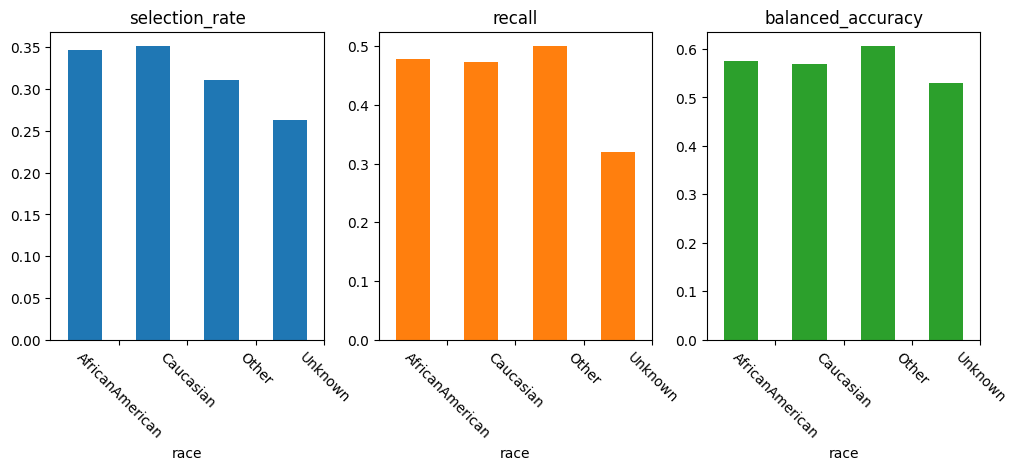

In [166]:
metricframe_baseline.by_group.plot.bar(subplots=True, layout= [1,3], figsize=(12, 4),
                                       legend=False, rot=-45, position=1.5)